In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [32]:
df = pd.read_csv('../../Data/Raw/Sampled Yelp Review Data.csv')
df.head()

,Unnamed: 0,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,670716,7/9/2010,9Nn0xmhNMD9W8W1z-UknIQ,0G-QF457q_0Z_jKqh6xWiA,I love sitting outside at the caf茅s that line ...,4,2,2,3,NR,8ljZdIJ-6j4PjR1EjzId7g
1,168448,5/23/2012,vbmplvJr4nZ1zKqGz6MebQ,AfIkqpTCtF28M2zNAj5rSA,"I live a block away from this place, and I dec...",4,0,0,0,NR,1p82vLo47SsW3aYZbxHipw
2,245044,2/27/2011,f17Q7D29xkJ_BQpIWcP2xg,pu_Aw_LpqAgUyaZkiY8HyA,The bbq pork sandwich is one of my great Rhode...,5,0,0,0,NR,5cdoxMpGrrwsoTTHYB1TIg
3,132348,4/21/2012,6Ie3C_G3-_Kc9izOPyznGA,axRg9Gsbq5-JznPkSGYlUQ,Definitely a gastronomic adventure and a uniqu...,5,0,2,0,NR,GJu1NAoV8VtoCdiw0mKKwQ
4,485478,1/27/2009,NLEzoWC2wHEIv7_c5uWdyQ,BfBC_x7SL7K2THafF6IM2w,What can I add that the 277 people before me d...,5,2,3,1,YR,u4ZOxRTE-9N9i-7iR8A4ig


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     100000 non-null  int64 
 1   date           100000 non-null  object
 2   reviewID       100000 non-null  object
 3   reviewerID     100000 non-null  object
 4   reviewContent  99999 non-null   object
 5   rating         100000 non-null  int64 
 6   usefulCount    100000 non-null  int64 
 7   coolCount      100000 non-null  int64 
 8   funnyCount     100000 non-null  int64 
 9   flagged        100000 non-null  object
 10  restaurantID   100000 non-null  object
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


In [34]:
df.nunique()

Unnamed: 0       100000
date               4147
reviewID         100000
reviewerID        15927
reviewContent     99891
rating                5
usefulCount          51
coolCount            42
funnyCount           52
flagged               4
restaurantID      58064
dtype: int64

Unnamed: 0 and reviewID are all unique, therefore they are IID and we can drop them

In [35]:
df = df.drop(["Unnamed: 0", "reviewID"], axis = 1)

In [36]:
df.head()

,date,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,7/9/2010,0G-QF457q_0Z_jKqh6xWiA,I love sitting outside at the caf茅s that line ...,4,2,2,3,NR,8ljZdIJ-6j4PjR1EjzId7g
1,5/23/2012,AfIkqpTCtF28M2zNAj5rSA,"I live a block away from this place, and I dec...",4,0,0,0,NR,1p82vLo47SsW3aYZbxHipw
2,2/27/2011,pu_Aw_LpqAgUyaZkiY8HyA,The bbq pork sandwich is one of my great Rhode...,5,0,0,0,NR,5cdoxMpGrrwsoTTHYB1TIg
3,4/21/2012,axRg9Gsbq5-JznPkSGYlUQ,Definitely a gastronomic adventure and a uniqu...,5,0,2,0,NR,GJu1NAoV8VtoCdiw0mKKwQ
4,1/27/2009,BfBC_x7SL7K2THafF6IM2w,What can I add that the 277 people before me d...,5,2,3,1,YR,u4ZOxRTE-9N9i-7iR8A4ig


In [27]:
df.describe()

,rating,usefulCount,coolCount,funnyCount
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.734810,1.572310,1.026830,0.867120
std,1.140025,2.742496,2.239214,2.294083
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,5.000000,59.000000,56.000000,127.000000


In [37]:
df.flagged.value_counts()

NR    50910
YR    40559
N      7460
Y      1071
Name: flagged, dtype: int64

In [28]:
missing_values = df.isnull().sum()

# Print the columns with missing values
print('Columns with missing values:')
print(missing_values[missing_values > 0])

Columns with missing values:
reviewContent    1
dtype: int64


<AxesSubplot:>

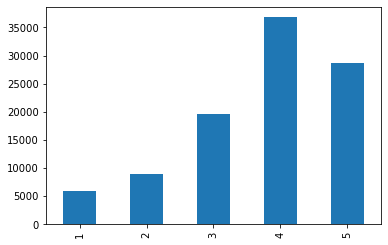

In [43]:
df.rating.value_counts().sort_index().plot(kind = "bar")